# **Import the necessary libraries**



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/Weather Data.csv')

In [ ]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
data.shape

(8784, 8)

In [ ]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [ ]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

# **Data Preprocessing**

In [ ]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data['Date/Time']

0      2012-01-01 00:00:00
1      2012-01-01 01:00:00
2      2012-01-01 02:00:00
3      2012-01-01 03:00:00
4      2012-01-01 04:00:00
               ...        
8779   2012-12-31 19:00:00
8780   2012-12-31 20:00:00
8781   2012-12-31 21:00:00
8782   2012-12-31 22:00:00
8783   2012-12-31 23:00:00
Name: Date/Time, Length: 8784, dtype: datetime64[ns]

In [ ]:
data.set_index('Date/Time', inplace=True)

In [ ]:
data.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


# **Analyzing Trends and Patterns**

# **Analyze the data to identify weather trends, seasonal patterns, and temperature variations over time.**

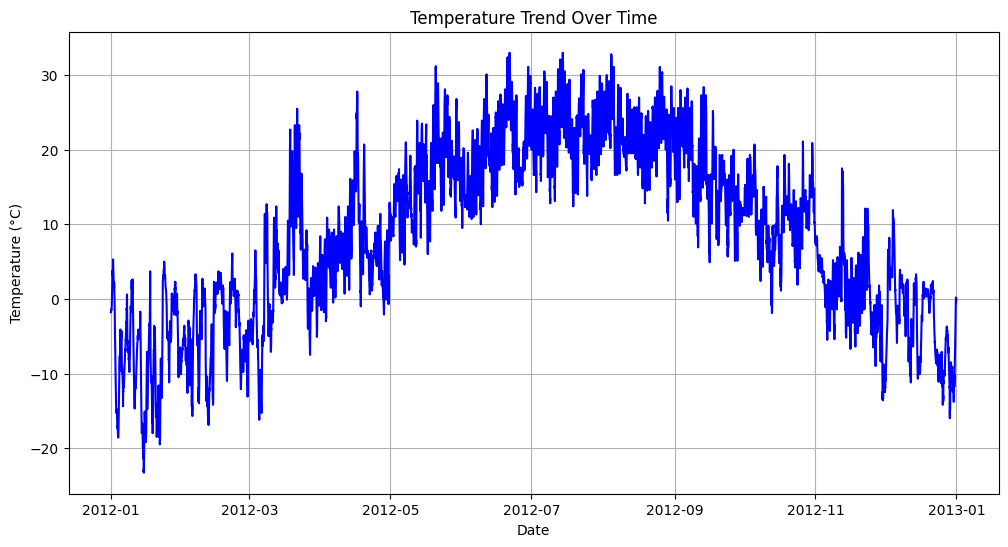

In [ ]:
import matplotlib.pyplot as plt

# Plot temperature variations over time
plt.figure(figsize=(12, 6))
plt.plot(data['Temp_C'], color='blue')
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.show()


In the above plot we identify periods of exceptionally high or low temperatures. Sudden spikes or drops could be related to specific weather events or anomalies.

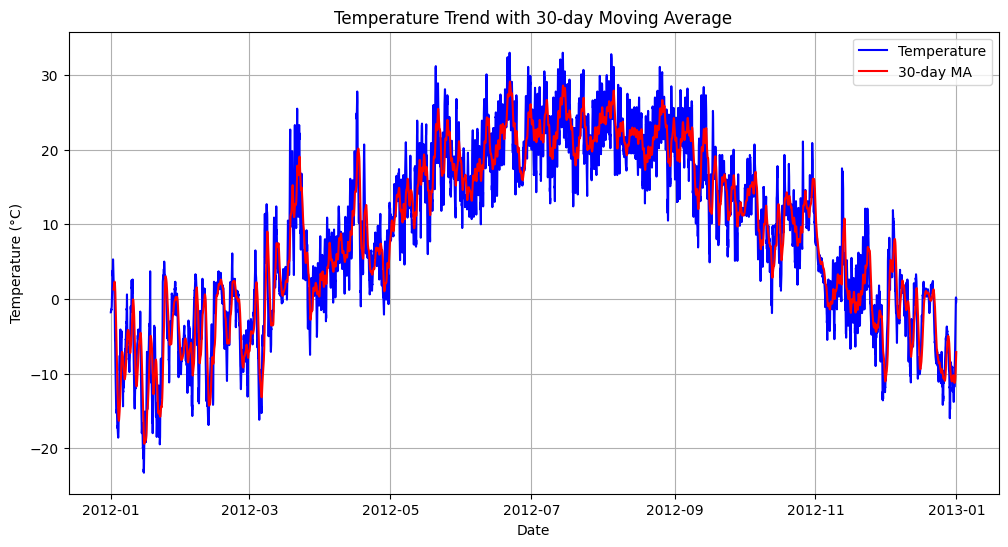

In [ ]:
# Calculate 30-day moving average for temperature
data['30-day MA'] = data['Temp_C'].rolling(window=30).mean()

# Plot temperature trend with moving average
plt.figure(figsize=(12, 6))
plt.plot(data['Temp_C'], label='Temperature', color='blue')
plt.plot(data['30-day MA'], label='30-day MA', color='red')
plt.title('Temperature Trend with 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()


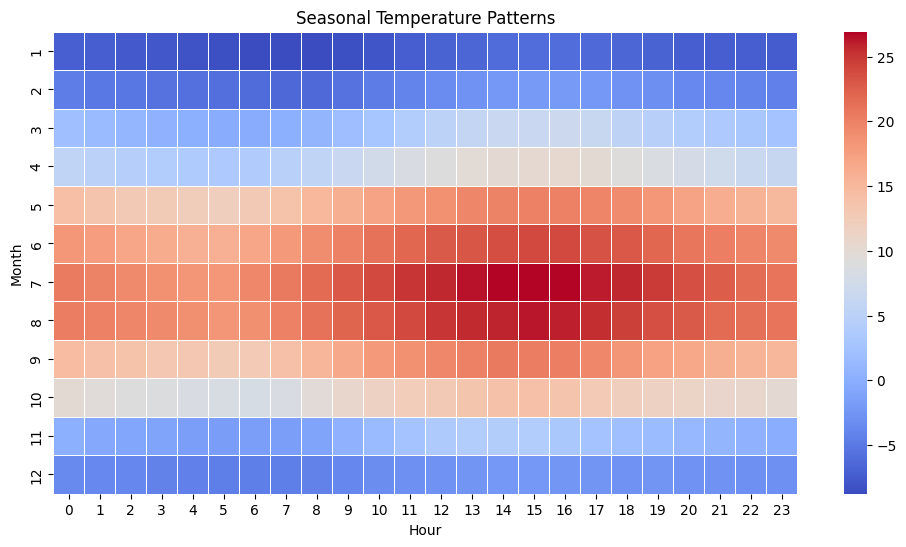

In [ ]:
import seaborn as sns

# Extract month and hour from the index
data['Month'] = data.index.month
data['Hour'] = data.index.hour

# Create a pivot table for monthly average temperatures
pivot_table = data.pivot_table(index='Month', columns='Hour', values='Temp_C', aggfunc='mean')

# Plot heatmap for seasonal temperature patterns
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', linewidths=0.5)
plt.title('Seasonal Temperature Patterns')
plt.xlabel('Hour')
plt.ylabel('Month')
plt.show()


The above plot  generates a heatmap that displays the seasonal temperature patterns based on the hourly and monthly variations in the temperature data.

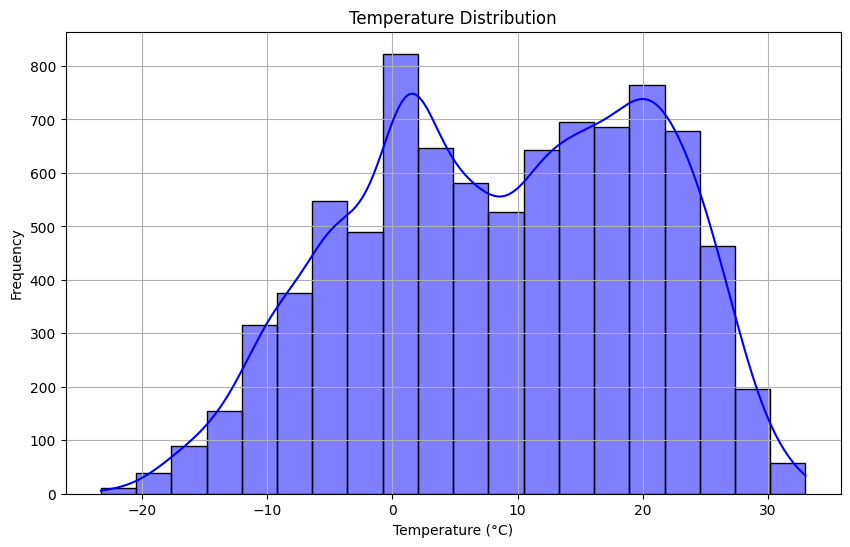

In [ ]:
# Plot histogram of temperature distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Temp_C'], bins=20, kde=True, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


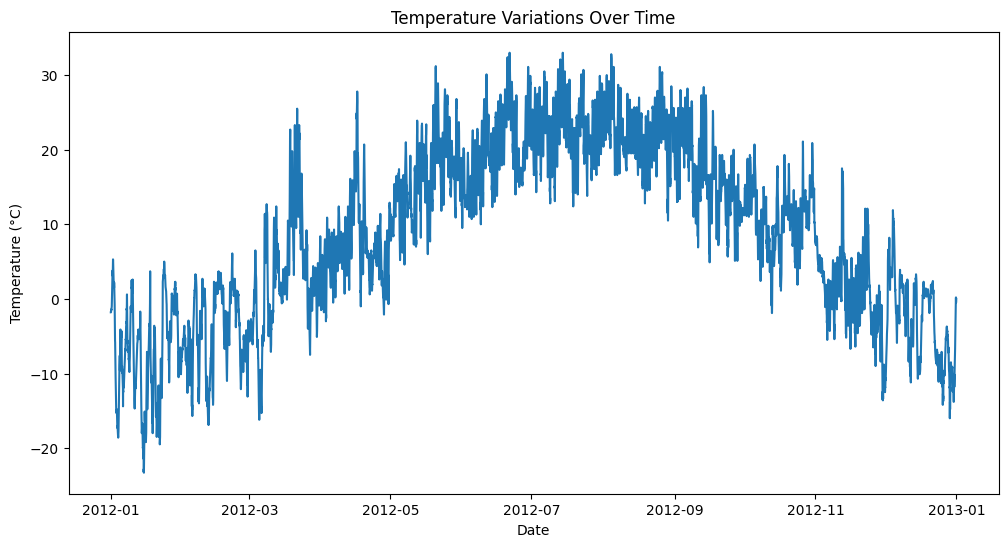

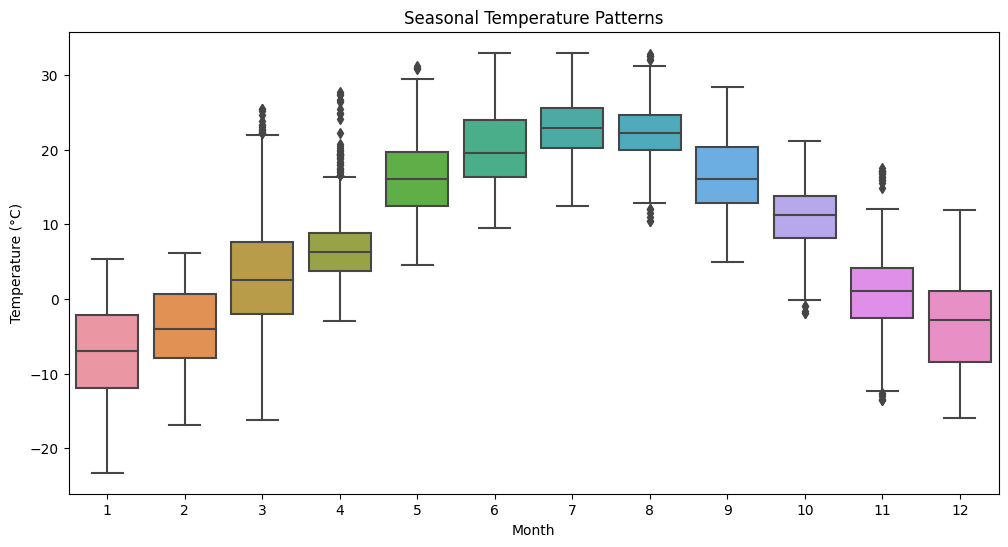

<ipython-input-428-6dfef0cb5788>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


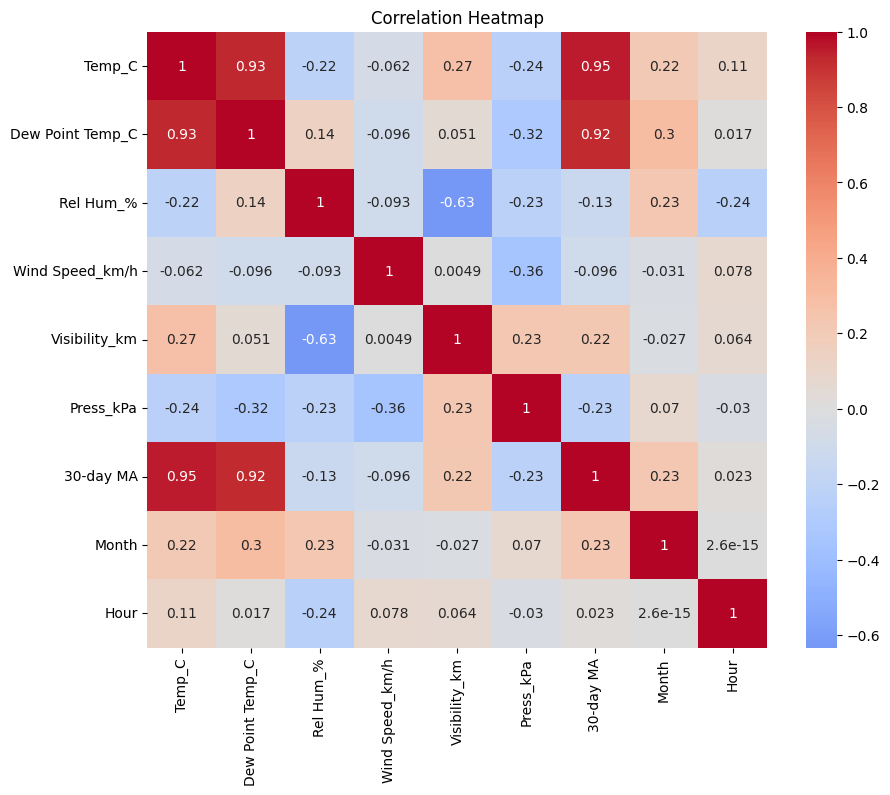

In [ ]:

# Plot temperature variations over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data['Temp_C'])
plt.title('Temperature Variations Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

# Explore seasonal patterns using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x=data.index.month, y='Temp_C')
plt.title('Seasonal Temperature Patterns')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

# Analyze trends and correlations
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


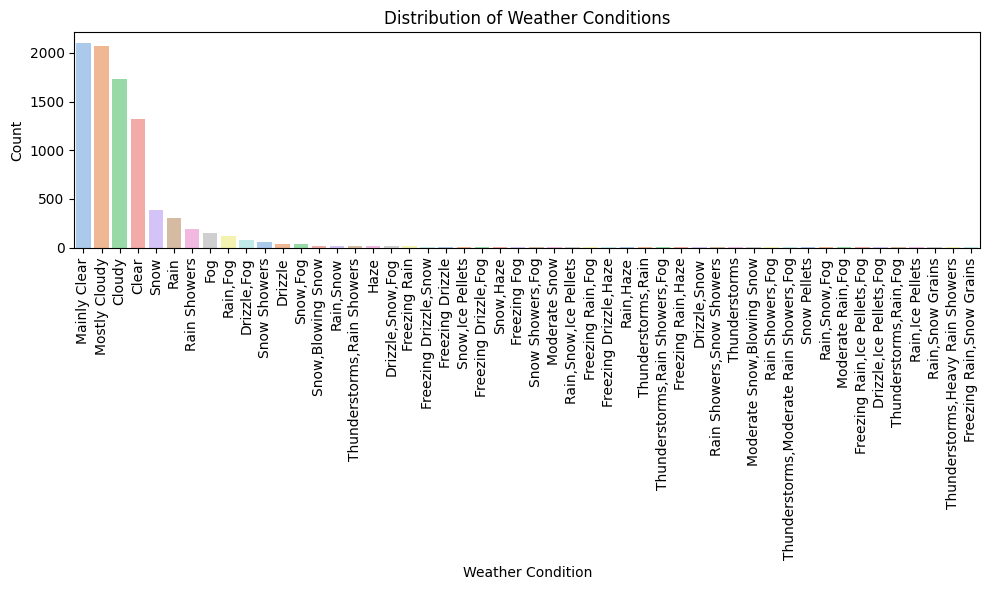

In [ ]:
weather_counts = data['Weather'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="pastel")
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Distribution of Weather Conditions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

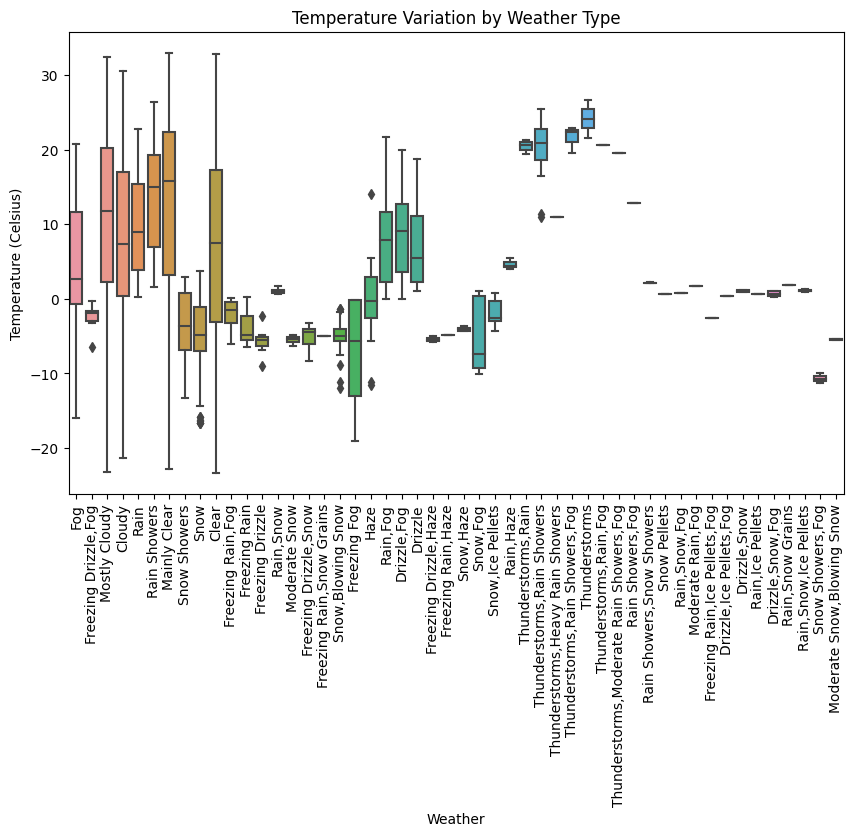

In [ ]:
#Temperature Variation by Weather Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Temp_C', data=data)
plt.title('Temperature Variation by Weather Type')
plt.xlabel('Weather')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=90)
plt.show()

The above plot generates a boxplot that illustrates the temperature variation for different weather conditions. Each boxplot represents the distribution of temperature values for a specific weather type.

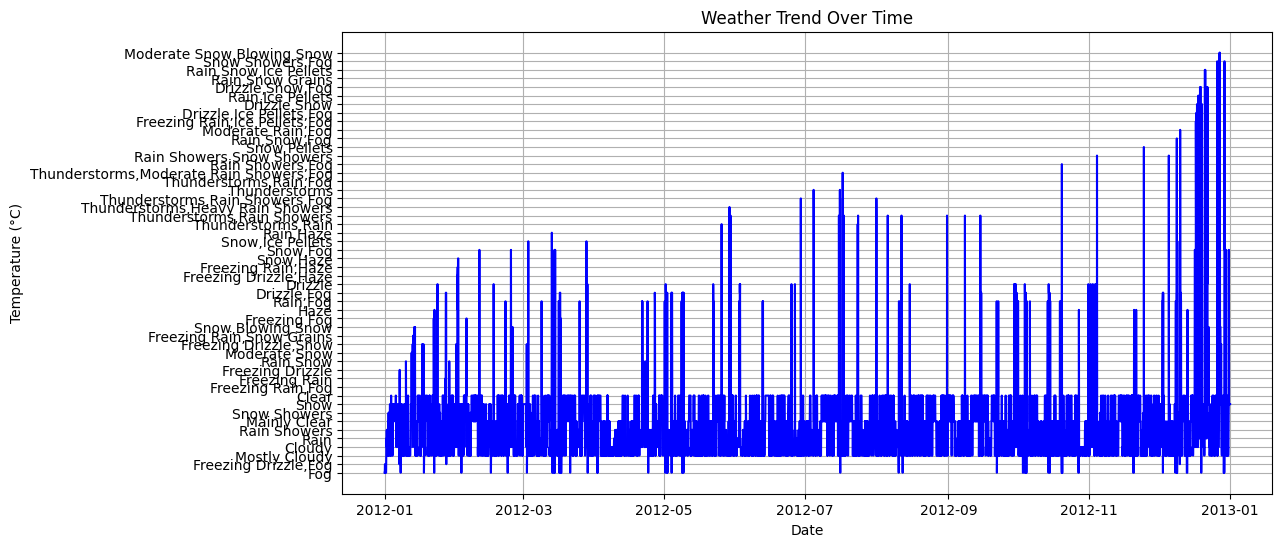

In [ ]:
import matplotlib.pyplot as plt

# Plot Weather variations over time
plt.figure(figsize=(12, 6))
plt.plot(data['Weather'], color='blue')
plt.title('Weather Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Weather')
plt.grid()
plt.show()

The above plot that encodes weather conditions over time using a line graph.

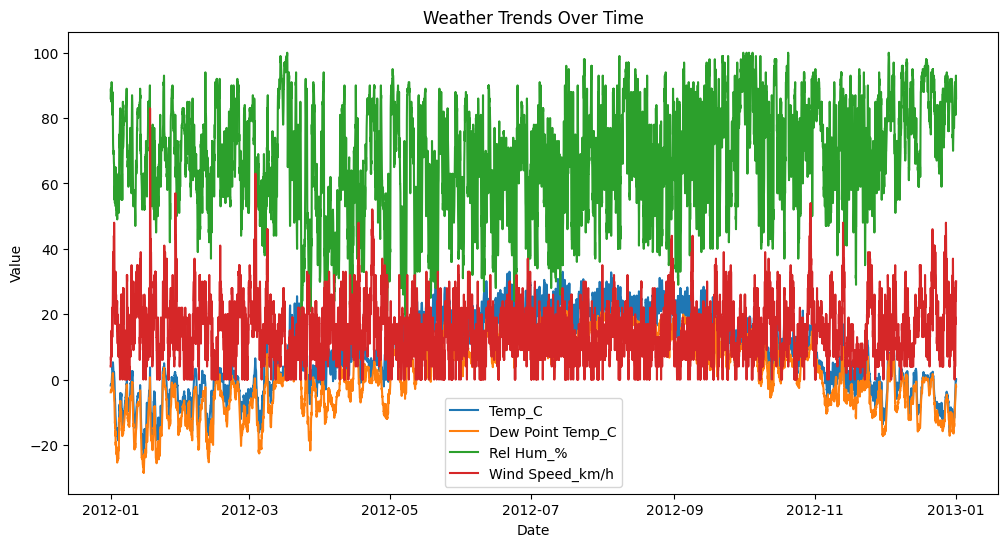

In [ ]:
weather_columns = ['Temp_C',	'Dew Point Temp_C',	'Rel Hum_%',	'Wind Speed_km/h'	]

# Plotting weather trends
plt.figure(figsize=(12, 6))
for column in weather_columns:
    plt.plot(data.index, data[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Weather Trends Over Time')
plt.legend()
plt.show()

# **Use historical weather data to build predictive models for weather forecasting.**

In [ ]:
data['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import adfuller

In [ ]:
label_encoder = LabelEncoder()

# Encode the 'Weather' column
data['Encoded_Weather'] = label_encoder.fit_transform(data['Weather'])
data['Encoded_Weather']

Date/Time
2012-01-01 00:00:00     7
2012-01-01 01:00:00     7
2012-01-01 02:00:00     9
2012-01-01 03:00:00     9
2012-01-01 04:00:00     7
                       ..
2012-12-31 19:00:00    35
2012-12-31 20:00:00    35
2012-12-31 21:00:00    35
2012-12-31 22:00:00    35
2012-12-31 23:00:00    35
Name: Encoded_Weather, Length: 8784, dtype: int64

The above code encodes the weather column using LabelEncoder

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(data['Encoded_Weather'])

In [ ]:
def adfuller_test(Encoded_Weather):
    result=adfuller(Encoded_Weather)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(data['Encoded_Weather'])

ADF Test Statistic : -29.61778431366128
p-value : 0.0
#Lags Used : 3
Number of Observations Used : 8780
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Here we check the stationarity of the Encoded data using adfuller test

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


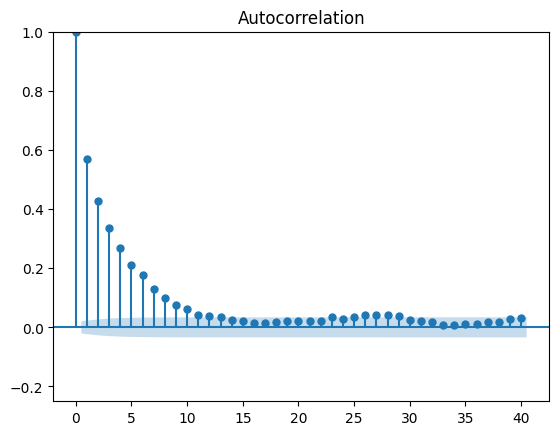

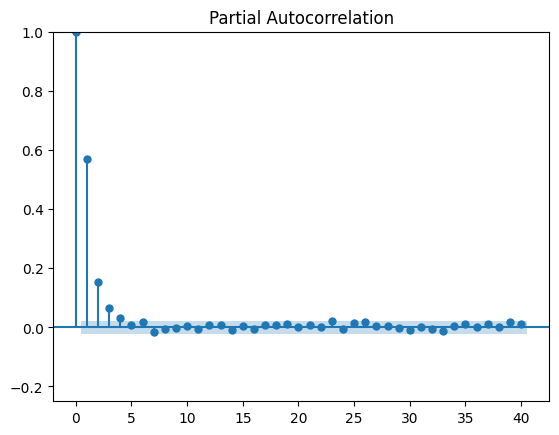

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Encoded_Weather'])
plt.ylim(bottom=-0.25)
plot_pacf(data['Encoded_Weather'])
plt.ylim(bottom=-0.25)
plt.show()

Here We plot the ACF and PACF plots of the Encoded weather column to find the p and q values

In [ ]:
features = ['Temp_C','Rel Hum_%','Wind Speed_km/h','Press_kPa'	]
x=data[features].resample('D').mean()
y = data['Encoded_Weather'].resample('D').mean()


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 0)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
order = (1,0,1)  # Specify the order (p, d, q)
model = ARIMA(y_train, order=order)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
forecast_index = pd.date_range(start=y.index[-1], periods=forecast_steps+1, freq='D')[1:]

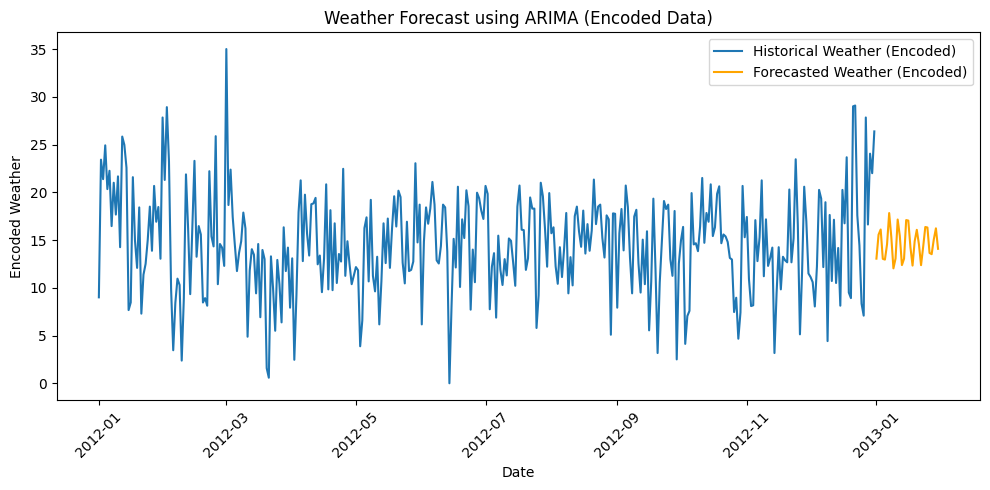

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y.index,y, label='Historical Weather (Encoded)')
plt.plot(forecast_index, forecast, label='Forecasted Weather (Encoded)', color='orange')
plt.xlabel('Date')
plt.ylabel('Encoded Weather')
plt.title('Weather Forecast using ARIMA (Encoded Data)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The above code creates a line plot that compares historical encoded weather values with forecasted encoded weather values using the ARIMA model.

# **Study the dataset to assess long-term climate trends and changes.**

In [ ]:
data

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,30-day MA,Month,Hour,Encoded_Weather
Date/Time,,,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,NaN,1,0,7
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,NaN,1,1,7
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",NaN,1,2,9
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",NaN,1,3,9
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,NaN,1,4,7
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,-8.666667,12,19,35
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,-8.266667,12,20,35
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,-7.906667,12,21,35


In [ ]:
monthly_mean_temp = data['Temp_C'].resample('M').mean()
monthly_mean_temp

Date/Time
2012-01-31    -7.371505
2012-02-29    -4.225000
2012-03-31     3.121237
2012-04-30     7.009306
2012-05-31    16.237769
2012-06-30    20.134028
2012-07-31    22.790054
2012-08-31    22.279301
2012-09-30    16.484444
2012-10-31    10.954973
2012-11-30     0.931389
2012-12-31    -3.306317
Freq: M, Name: Temp_C, dtype: float64

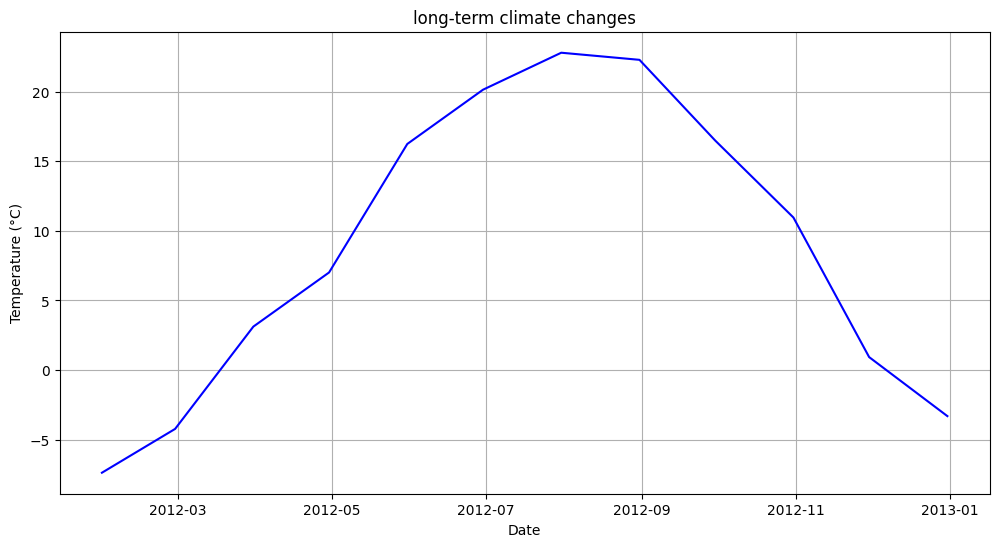

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_temp, color='blue')
plt.title('long-term climate changes')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.show()

The above code generates a line plot that visualizes the long-term climate changes by showing the monthly mean temperature variations over time.

# **Identify and analyze extreme weather events like heatwaves, cold spells, and storms.**


In [ ]:
heatwave_threshold = 30
cold_spell_threshold = 10
storm_wind_threshold = 25

In [ ]:
heatwave_events = data['Temp_C'] > heatwave_threshold
cold_spell_events = data['Temp_C'] < cold_spell_threshold

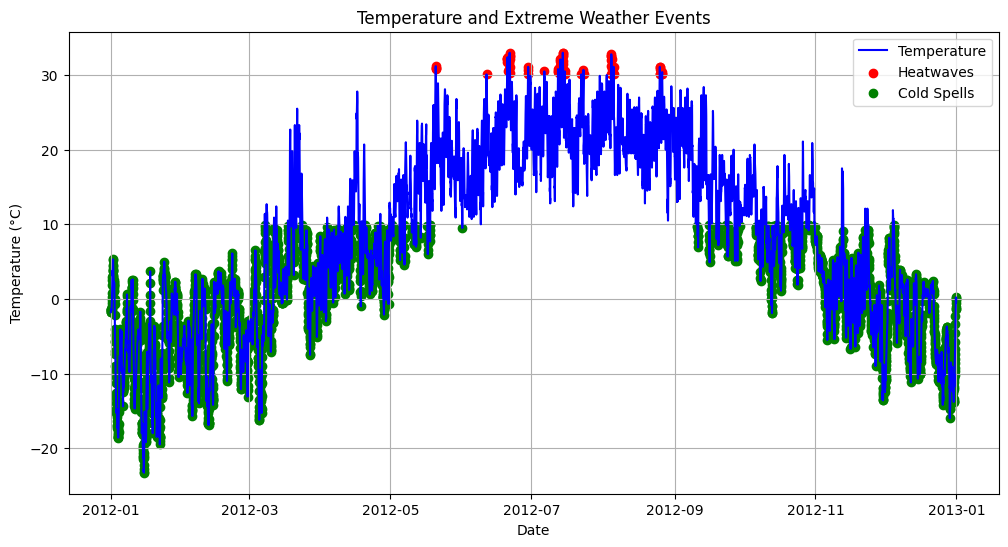

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Temp_C'], color='b', label='Temperature')
plt.scatter(data.index[heatwave_events], data['Temp_C'][heatwave_events], color='r', label='Heatwaves')
plt.scatter(data.index[cold_spell_events], data['Temp_C'][cold_spell_events], color='g', label='Cold Spells')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature and Extreme Weather Events')
plt.legend()
plt.grid(True)
plt.show()

The above code generates a line plot that visualizes the temperature variations over time, with markers indicating extreme weather events such as heatwaves (in red) and cold spells (in green)

In [ ]:
storm_events = data['Wind Speed_km/h'] > storm_wind_threshold

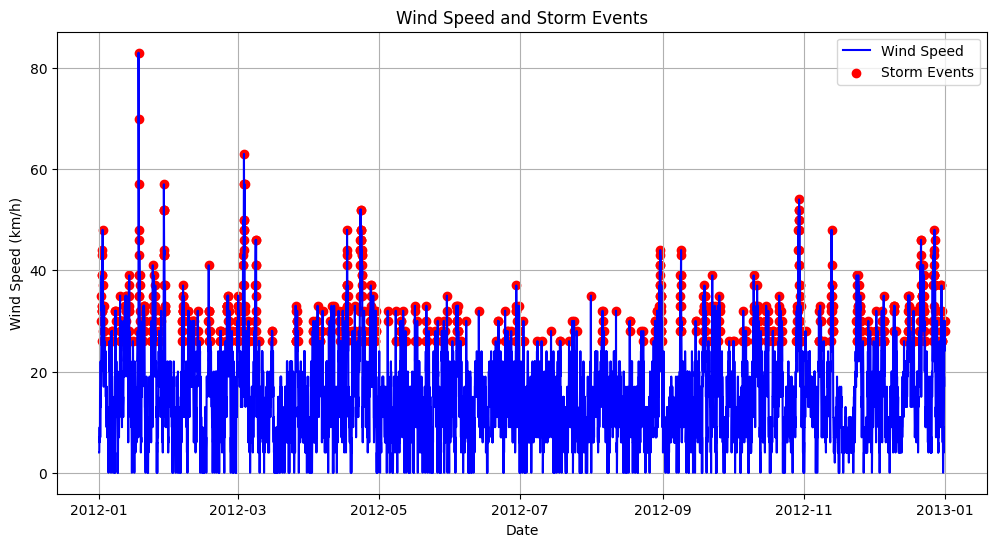

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Wind Speed_km/h'], color='b', label='Wind Speed')
plt.scatter(data.index[storm_events], data['Wind Speed_km/h'][storm_events], color='r', label='Storm Events')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed and Storm Events')
plt.legend()
plt.grid(True)
plt.show()

The above code generates a line plot that visualizes the wind speed variations over time, with red markers indicating storm events.